#### Dimensionality Reduction: PCA
#### Why PCA is done?
this is done to deal with curse of dimensionality where a lot of features in the model can lead to overfitting and less generalisation.
Additionally it becomes computionally expensive and time consuming to have a lot of feature in a ML model

#### How PCA is done?
we calculate the best vector space which represents the best fit line. the criteria of selecting the best fit line is to have minimum loss of information. for example, if we try to convert 2d features into 1d features then we try to project 2d features on a single line in such a way that the information loss is minimum.

In [33]:
# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

#### Getting the Cancer dataset for PCA.

In [34]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

In [12]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [35]:
cancer['feature_names'] # independent features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [39]:
df=pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df['target']=cancer['target']# adding the target column
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### PCA Visualization:
here we have got 30 dimensions in the cancer dataset. Through PCA, we are going
to reduce the dimensions from 30 to 2 and then visualise if the target variable
can be categorised or not.
this visualization is only possible upto 3 dimensions. in most of the scenario, we won't be able
to visualise higher dimensions even after applying PCA until the dimensions are reduced to
3 or 2.

we have to do feature scaling before PCA as the features with the larger values will dominate the result of PCA. In standardization, each feature will go through the standard scaler equation to convert the values in such a way that the mean is 0 and std deviation is 1.

#### Steps Involved:
1) train-test split

2) Feature scaling

3) PCA

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [58]:
#train-test split:
X=df.iloc[:,:-1]
y=df.iloc[:,-1:]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [59]:
#Standardization
Scaler=StandardScaler().fit(X_train)
X_train_scaled=Scaler.transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [60]:
#PCA
pca=PCA(n_components=2).fit(X_train_scaled)
X_train_pca=pca.transform(X_train_scaled)
X_test_pca=pca.transform(X_test_scaled)


In [63]:
X_train_pca.shape

(455, 2)

#### Visualizing the output with respect to 2 feature only after PCA

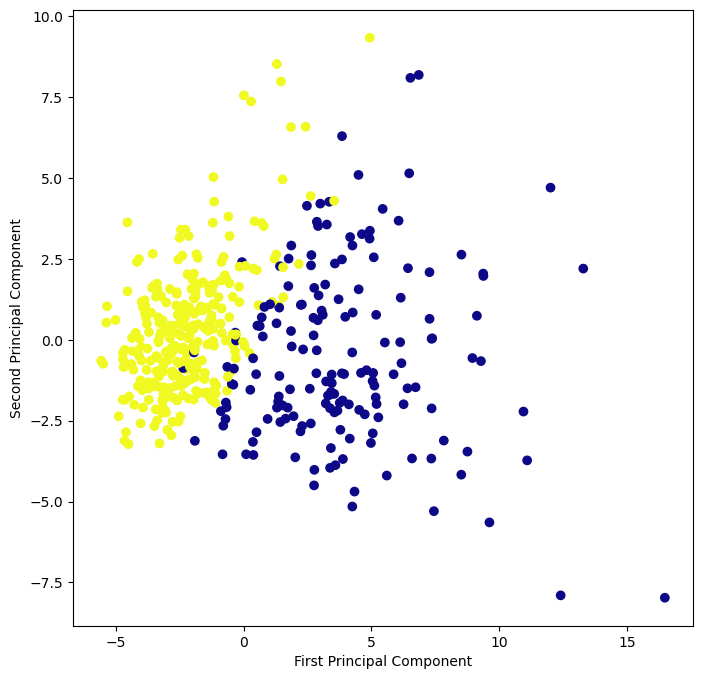

In [84]:
plt.figure(figsize=(8,8))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train.to_numpy(),cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

#### Analysis: here after converting 30 features into 2 features we can see the distribution of the data with respect to the target variable. the data is not overlapping and can be categorised easily even after converting it into 2D.